# Web scraping and data preparation using Beautiful Soup, Requests and pandas

*This notebook is mainly inspired by Will Koehrsen's tutorial ["Web Scraping, Regular Expressions, and Data Visualization: Doing it all in Python"](https://towardsdatascience.com/web-scraping-regular-expressions-and-data-visualization-doing-it-all-in-python-37a1aade7924).*

In this tutorial, you will learn how to:

1. Scrape a web page with [Requests](https://docs.python-requests.org/en/latest/) 


1. Pulling data out of HTML using  [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


1. Perform data tidying using [pandas](https://pandas.pydata.org/)


1. Visualize data with [altair](https://altair-viz.github.io/)

## Prerequisites

To start this tutorial, you need: 

- Some basic understanding of HTML and CSS as well as the Chrome extension SelectorGadget. 

> Follow the instructions in this [web scraping tutorial](https://kirenz.github.io/codelabs/codelabs/webscraping/#0) to learn more.

## Setup

In [1]:
%matplotlib inline
from IPython.display import IFrame

import requests 
from bs4 import BeautifulSoup

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Scrape with Requests

- First, take a look at the [website](https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html) 


In [2]:
# Display website in notebook
IFrame('https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html', width=800, height=450)


- There are 2 pieces of information we want extract from the text:

  - names of the presidents
  - salaries 

- We use the `requests` library for retrieving the complete HTML content from this webpage:

In [3]:
# Make the GET request to a url
url = 'http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'

# html = requests.get(___)

- Check if the response was succesfull

In [4]:
html

<Response [200]>

- Response 200 means that the request has succeeded. 

## Investigate HTML with Beautiful Soup

In [5]:
soup = BeautifulSoup(___, 'html.parser')

- The relevant data (names and salary) is inside `soup` somewhere.

- Next, we need to locate it using [CSS selectors](https://www.w3schools.com/cssref/css_selectors.asp). 

- One way to do this is by going to the [website](https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html) and inspecting the element (e.g. using DevTools in Google Chrome). 

- We find that the relevant information is stored as unorder list (`ul`)

- Investigate the element `ul`
- Use .prettify() to make the output more readable

In [1]:
# print(___)

- We save the content as `u_list`

In [7]:
# u_list = ___

- Note that we also could extract only the text of element `ul` (using `soup.ul.text`)

- However, this would make it more difficult to extract specific information from the object, since the structure is lost (use `print(soup.ul.text)`to observe the result

- Next, we iterate over the element `__?___` from `u_list` (use find_all)

In [2]:
# your code here

- Store the data in an array (called `raw_text`):

In [9]:
# your code here

## Data tidying

*We use some of the methods described in the pandas documentation about ["working with text data"](https://pandas.pydata.org/docs/user_guide/text.html#working-with-text-data)*

- We want to use pandas to perform our data tidying so let's create a dataframe (call the column "text"):

In [3]:
#df = pd.DataFrame( {"___": ___} )

# df

- A typical entry in our column text looks like:

"Grant Cornwell, College of Wooster (left in 2015): $911,651"

- In general, the structure is as follows:

"name, college (left in year): $salary"

- Note that the name is the first element and is followed by and semicolon (",")
- The salary is the last entry in our data (followed by the symbol "$")

### Extract names

- Extract the names of the presidents 

- Make a split at every "," and extract the first element with index 0

In [11]:
# df['name'] = df['text'].str.split("___").str.get(___)

In [5]:
# df.head()

### Extract salary

- Extract the salary:

In [13]:
# your code here

In [4]:
# df.head()

- Fix data format in salary (drop the ","):

In [15]:
# df['salary'] = df['salary'].str.replace("__", "")

- Make the salary data numeric (as int32)

In [7]:
 # df['___'] = df['___'].astype("___")

In [6]:
# df.info()

## Data visualization


- We will use the matplotlib and seaborn libraries for visualizing the results. 

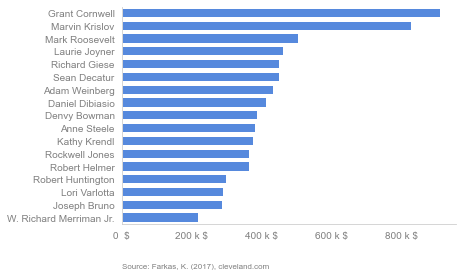

In [18]:
# use seaborn style whitegrid and hide grid
sns.set_style("whitegrid", {'axes.grid' : False})

# prepare plot
fig, ax = plt.subplots()

# create barplot
sns.barplot(x="salary", 
            y="name", 
            color="#3F83F4",
            linewidth = 2,
            data=df);

# define style of data output on x-axis
ax.xaxis.set_major_formatter('{x:1.0f} k $')
ax.xaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.xaxis.set_tick_params(which='major', labelcolor='grey')  
# define y-axis
ax.yaxis.set_tick_params(which='major', labelcolor='grey', labelleft=True)

# hide top and right lines around plot
sns.despine()

# we don't want a label
plt.ylabel("")
plt.xlabel("")

# Text for caption
txt = 'Source: Farkas, K. (2017), cleveland.com'

# Add the caption
plt.text(x = -5, 
         y = 20, 
         s = txt, 
         color = "grey",
         size = 8);